In [43]:
# -------------------------------------
# --- Go to correct starting folder ---
# -------------------------------------
# (when running jupyter lab in the browser, the notebook starts with CWD = folder where it is located, which breaks imports, ...)
import os
import pathlib

while not ((cwd := pathlib.Path(os.getcwd())) / "pyproject.toml").exists():
    os.chdir(cwd.parent)  # go 1 folder up

In [44]:
import math

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [45]:
inner = 1
outer = 100

t = outer / inner

atanh_025 = math.atanh(0.25)
atanh_075 = math.atanh(0.75)

log2_atanh_025 = math.log2(atanh_025)
log2_atanh_075 = math.log2(atanh_075)
log2_t = math.log2(t)

In [46]:
def base(_x: float) -> float:
    if _x <= 0:
        return 0.0
    elif _x <= 1:
        return 0.5 * _x * _x
    else:
        return _x - 0.5


def g(_z: float) -> float:
    if _z == 0:
        return 0.0
    elif _z < 0.0:
        return -g(-_z)
    else:
        log2_z = math.log2(_z)

        c = (log2_atanh_075 - log2_atanh_025) / log2_t

        log2_g = log2_atanh_025 + (c * log2_z)
        log2_g += (1 - c) * (base(log2_z - log2_t) - base(-log2_z))

        return math.exp2(log2_g)

    #
    #
    #
    #     # compute functions linear in log2_z
    #     g1 = log2_atanh_025 + log2_z
    #     g2 = log2_atanh_075 + (log2_z - log2_t) * (0.5 * (log2_atanh_075 - log2_atanh_025)/log2_t)
    #     g3 = (log2_z - log2_t)
    #
    #
    #
    #
    #
    # if _z <= 1.0:
    #     return _z*atanh_025
    # elif _z <= t:
    #     return atanh_025 + (atanh_075 - atanh_025)*(math.log2(_z) / math.log2(t))
    # else:
    #     return atanh_075 * (_z/t)


def f(_x: float) -> float:
    return math.tanh(g(_x / inner))

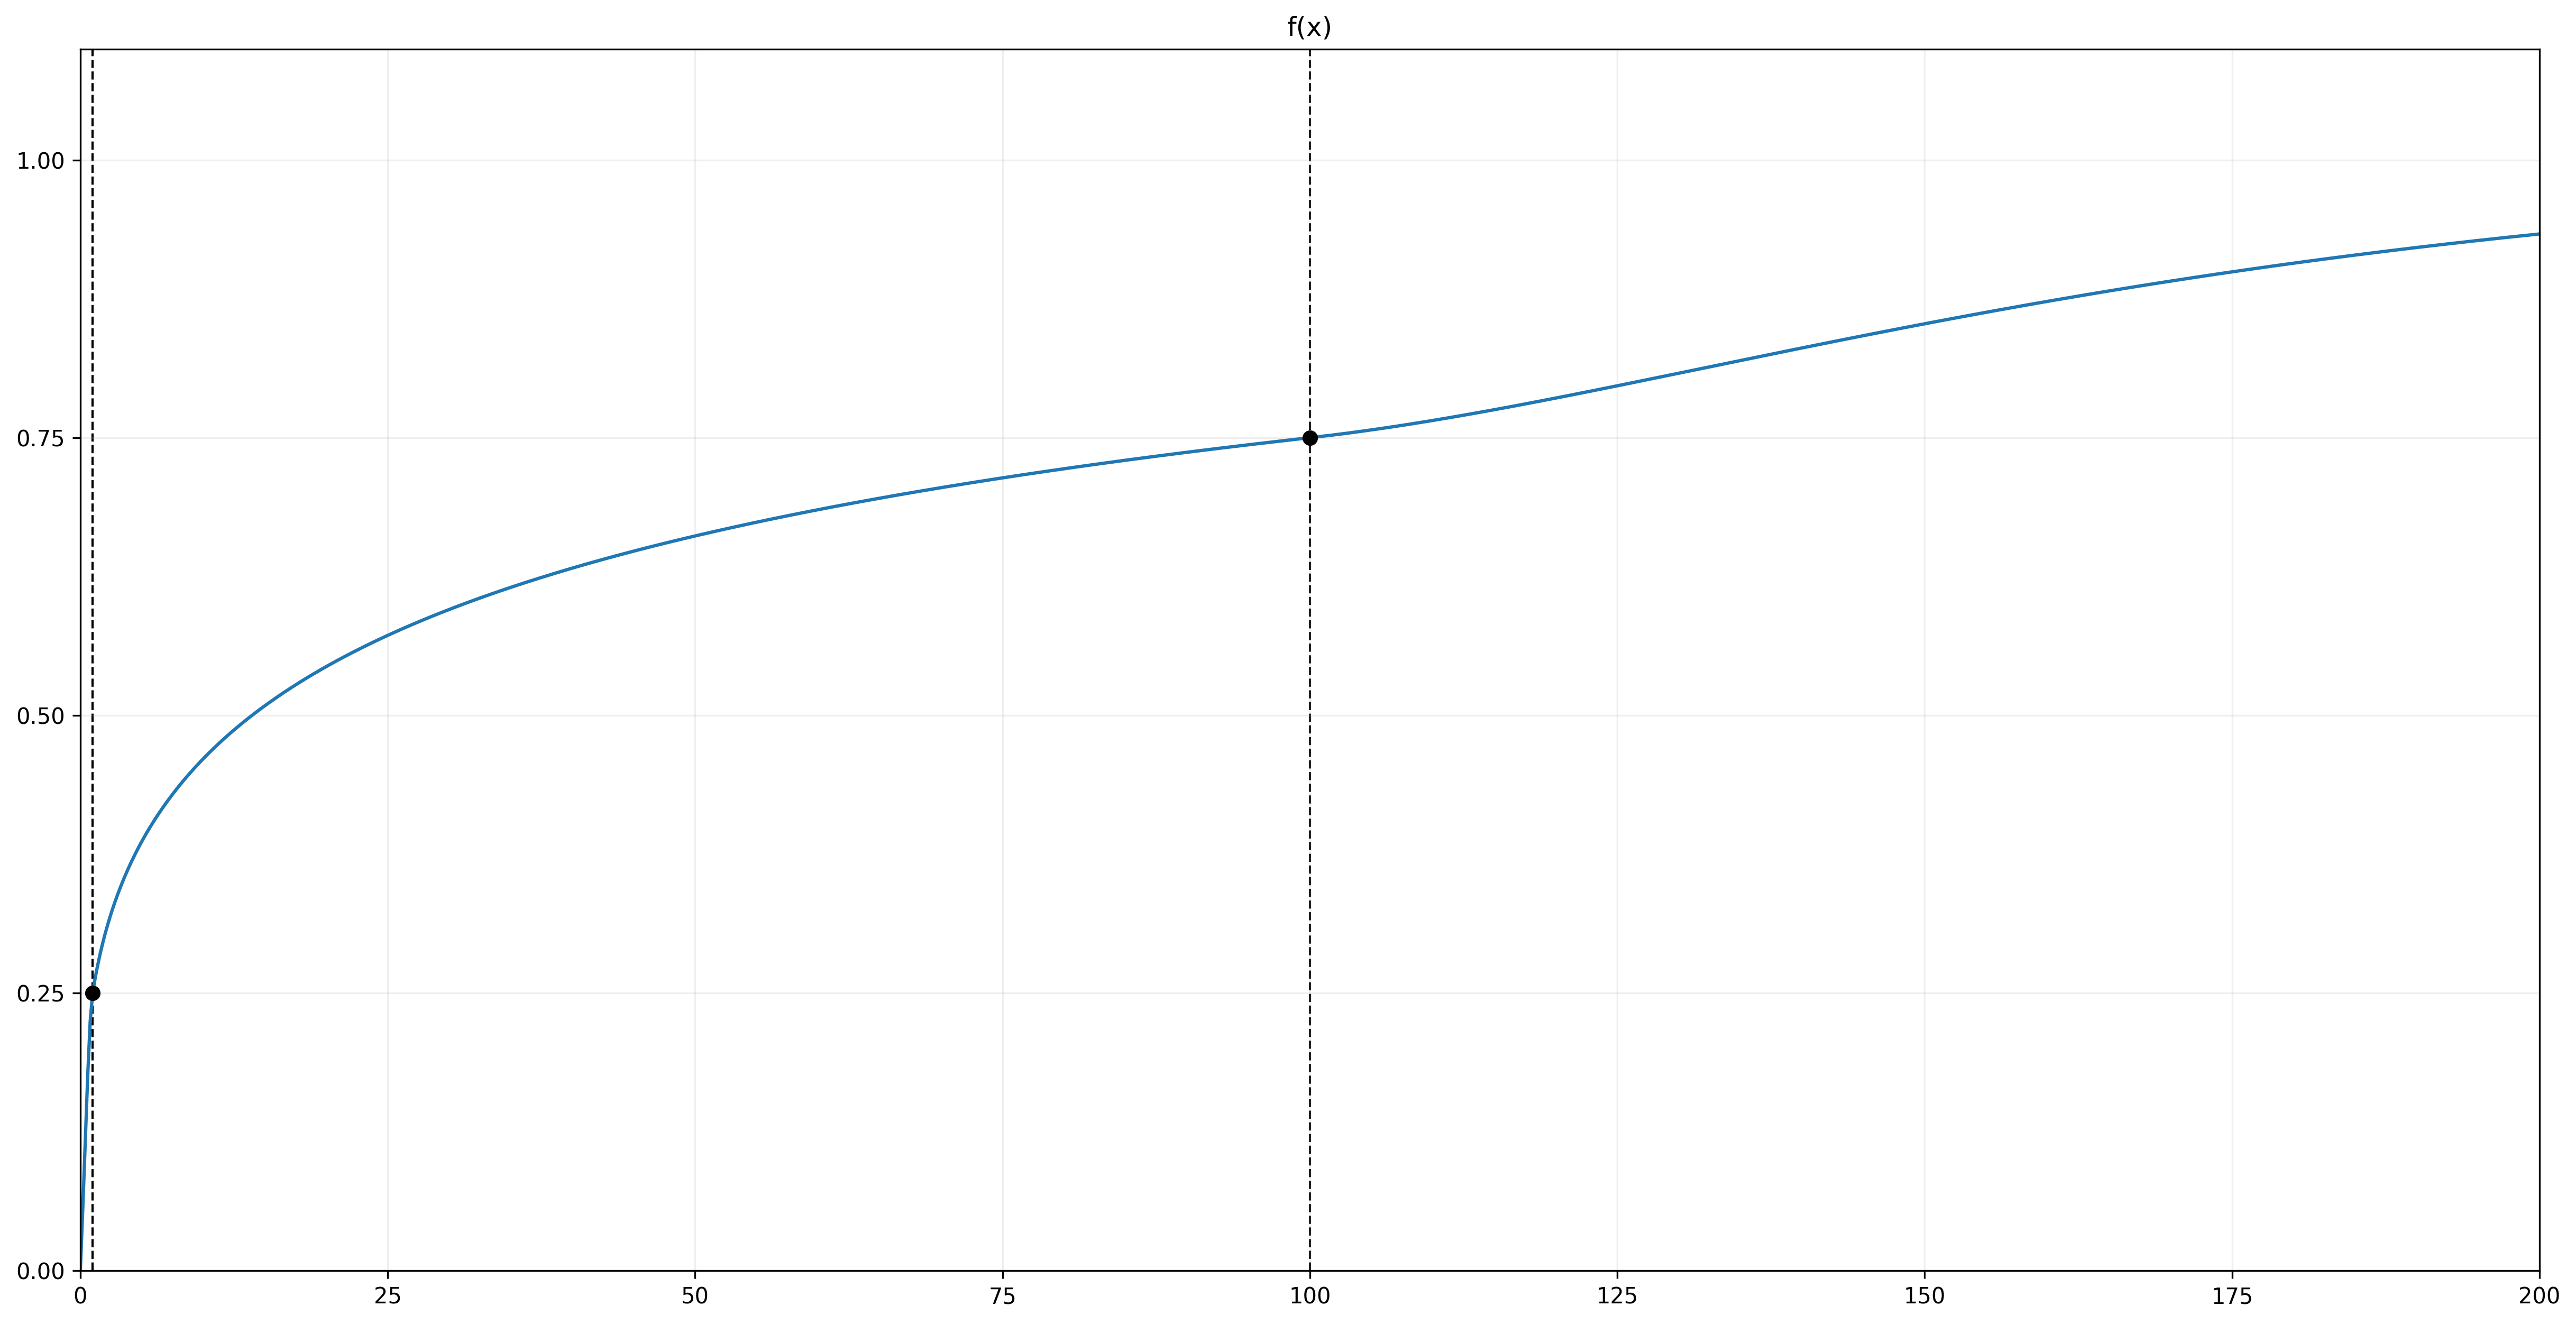

In [47]:
x_min_lin = 0.0
x_max_lin = outer * 2.0

# -------------------------------------------------------------------------
#  f(x) - LINEAR X
# -------------------------------------------------------------------------

x_values = np.linspace(x_min_lin, x_max_lin, 1000)
fx_values = [f(x) for x in x_values]

fig, ax = plt.subplots(1, 1)

ax.plot(x_values, fx_values)

ax.set_xlim(x_min_lin, x_max_lin)
ax.set_ylim(0.0, 1.1)
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])

ax.grid(True, alpha=0.2)

ax.plot([inner, outer], [0.25, 0.75], lw=0, marker="o", c="k")

ax.vlines([inner, outer], 0.0, 1.1, lw=1.0, color="k", ls="--", zorder=-1)

ax.set_title("f(x)")

fig.set_size_inches(w=20, h=10)

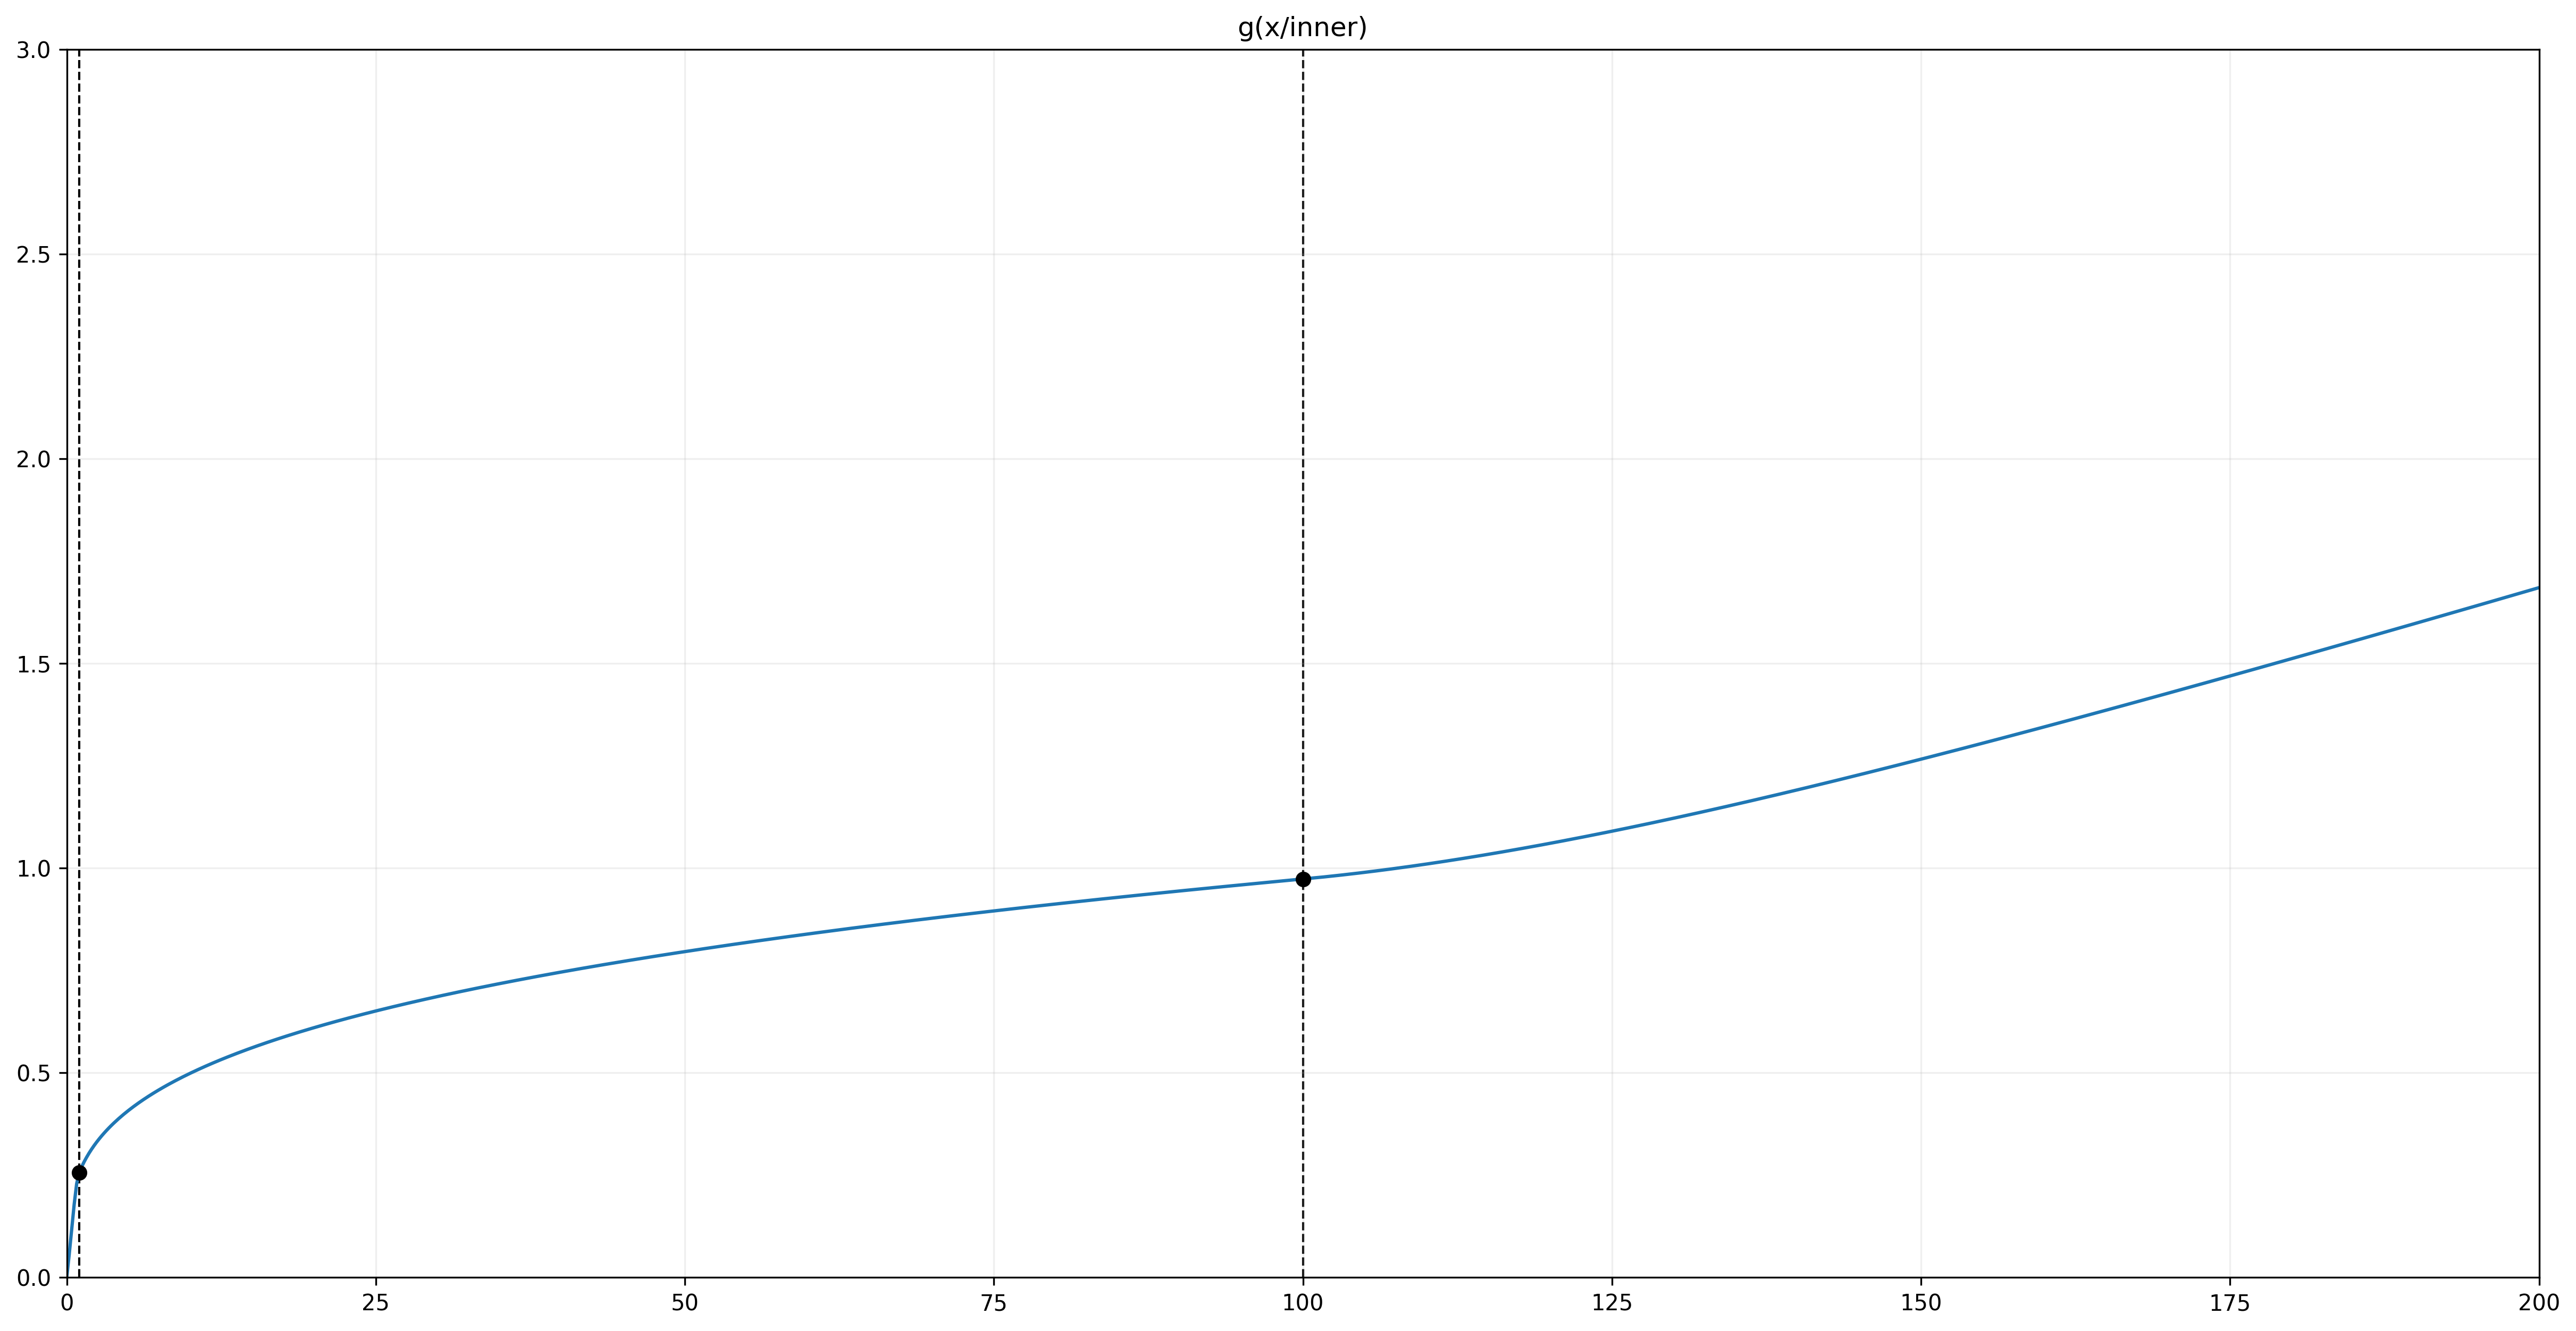

In [48]:
# -------------------------------------------------------------------------
#  g(x) - LINEAR Z
# -------------------------------------------------------------------------

x_values = np.linspace(x_min_lin, x_max_lin, 1000)
gx_values = [g(x / inner) for x in x_values]

fig, ax = plt.subplots(1, 1)

ax.plot(x_values, gx_values)

ax.set_xlim(x_min_lin, x_max_lin)
ax.set_ylim(0.0, 3.0)

ax.grid(True, alpha=0.2)

ax.plot([inner, outer], [math.atanh(0.25), math.atanh(0.75)], lw=0, marker="o", c="k")

ax.vlines([inner, outer], 0.0, 3.0, lw=1.0, color="k", ls="--", zorder=-1)

ax.set_title("g(x/inner)")

fig.set_size_inches(w=20, h=10)

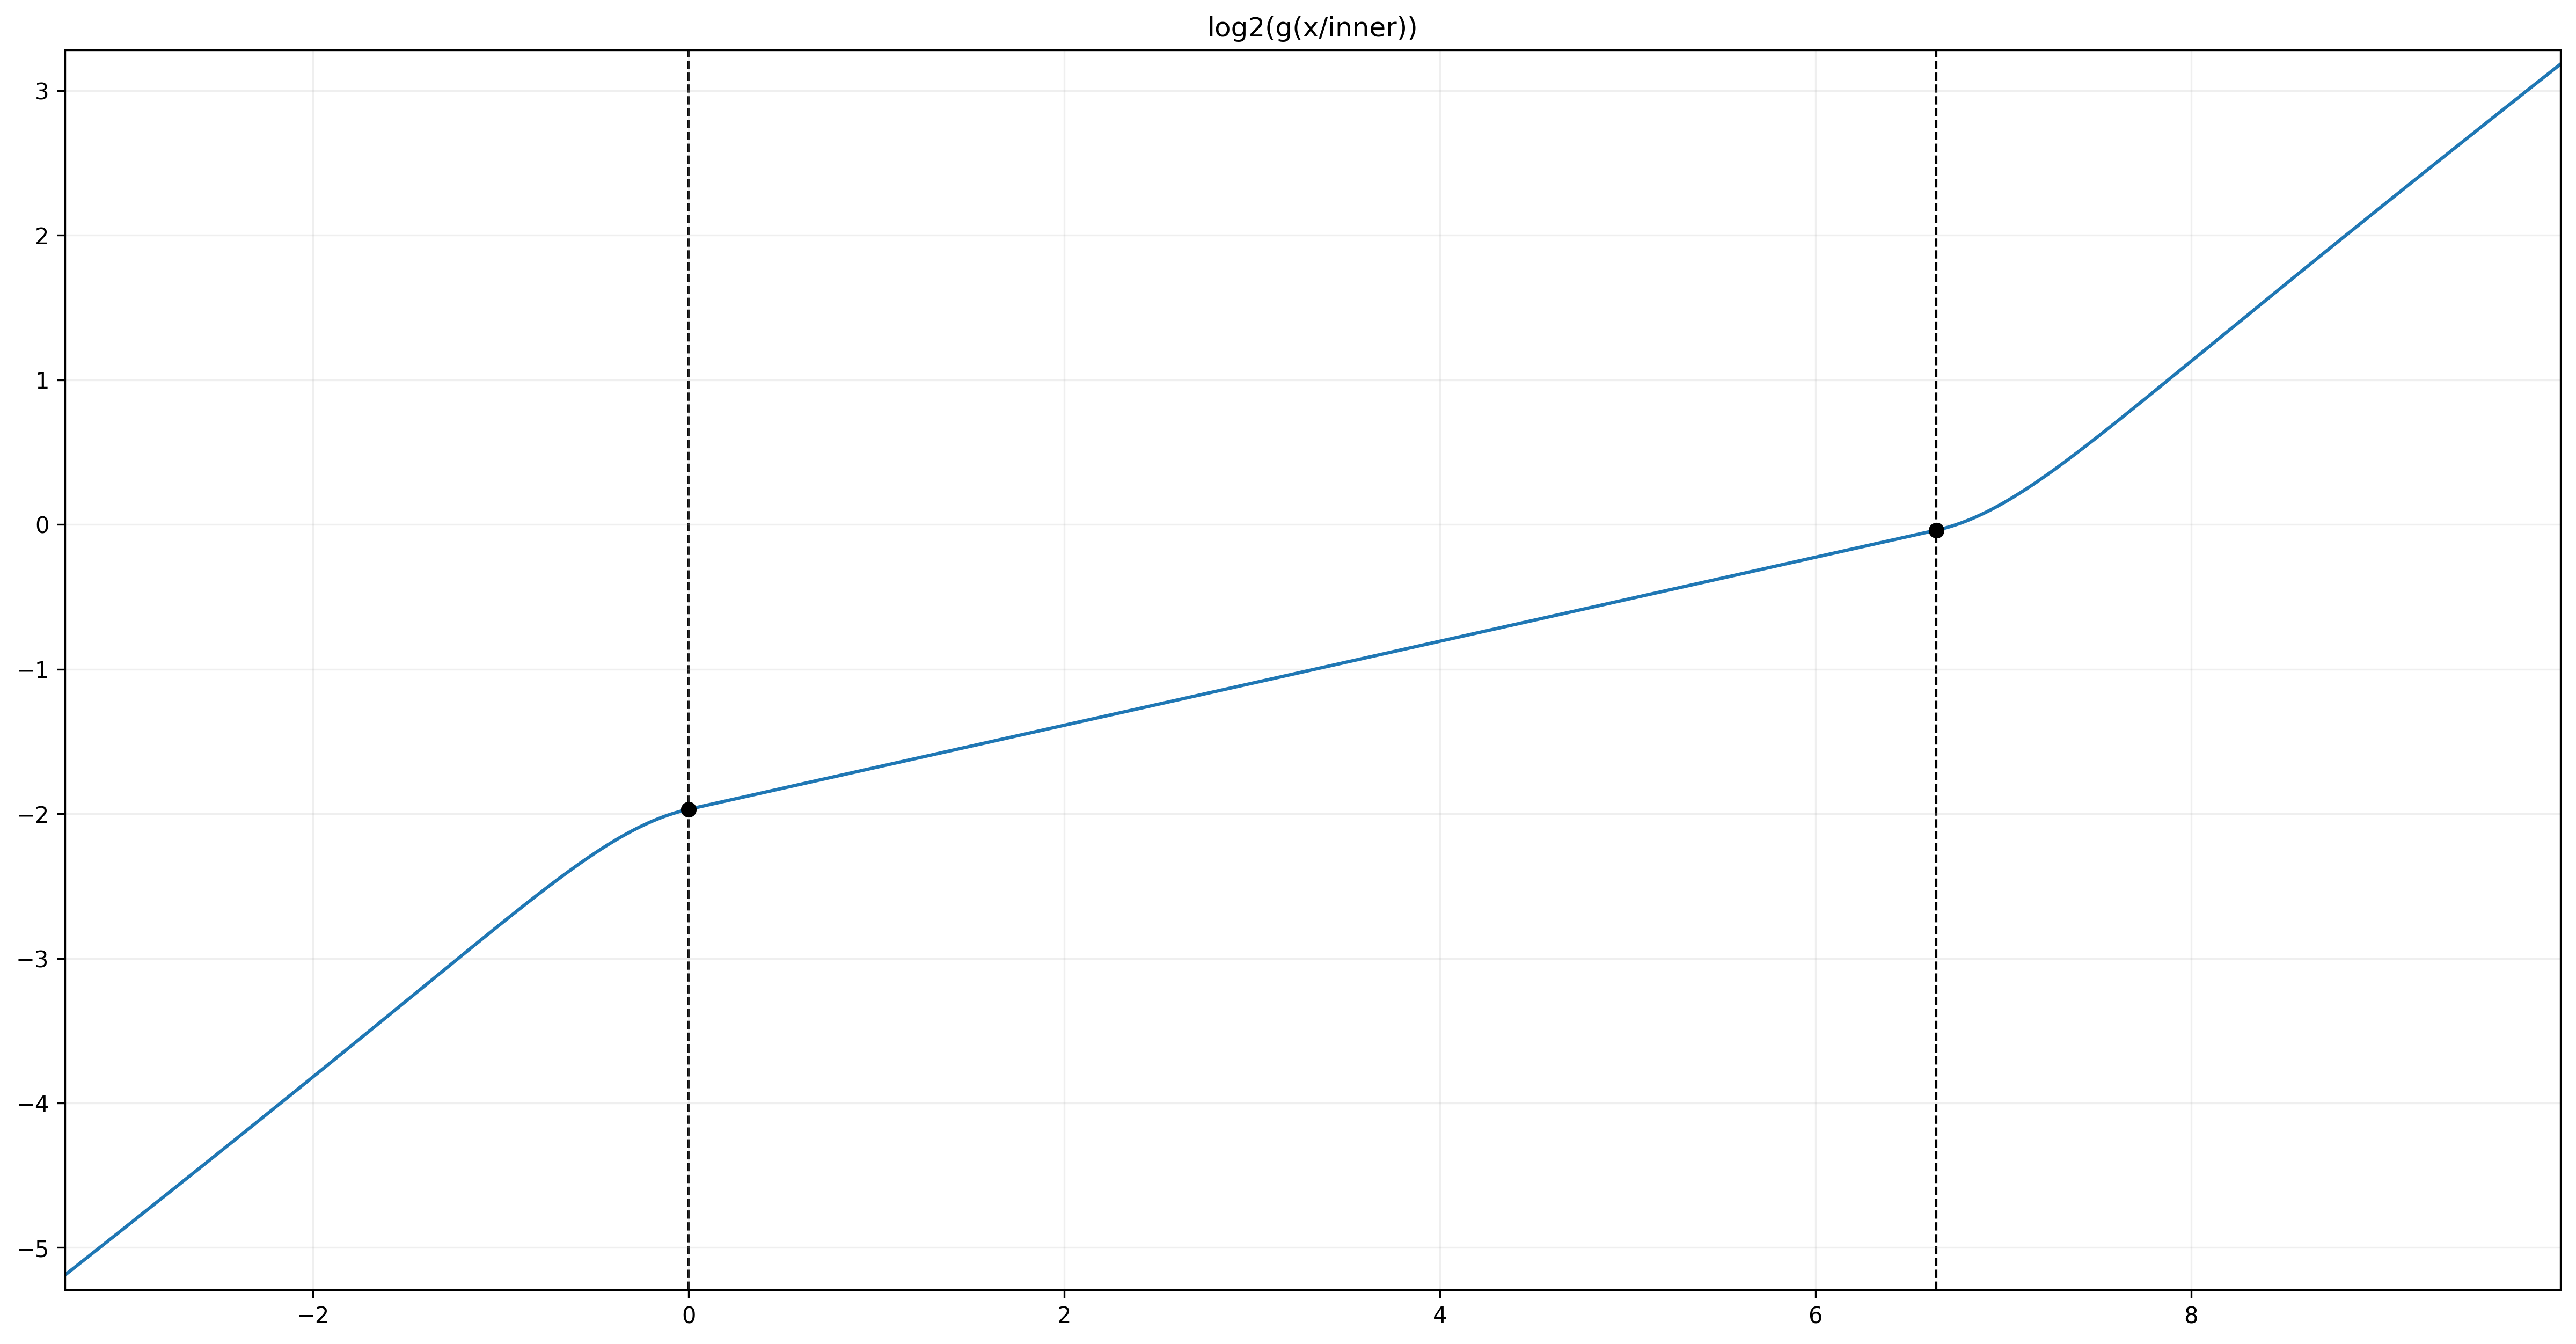

In [49]:
# -------------------------------------------------------------------------
#  log(g(x)) - LOG Z
# -------------------------------------------------------------------------

log2_x_min = math.log2(inner / 10)
log2_x_max = math.log2(outer * 10)

log2_x_values = np.linspace(log2_x_min, log2_x_max, 1000)
log2_gx_values = [math.log2(g(math.exp2(log2_x) / inner)) for log2_x in log2_x_values]

y_min = log2_atanh_025 - math.log2(10)
y_max = log2_atanh_075 + math.log2(10)

fig, ax = plt.subplots(1, 1)

ax.plot(log2_x_values, log2_gx_values)

ax.set_xlim(log2_x_min, log2_x_max)
ax.set_ylim(y_min, y_max)

ax.grid(True, alpha=0.2)

ax.plot([math.log2(inner), math.log2(outer)], [log2_atanh_025, log2_atanh_075], lw=0, marker="o", c="k")

ax.vlines([math.log2(inner), math.log2(outer)], y_min, y_max, lw=1.0, color="k", ls="--", zorder=-1)

ax.set_title("log2(g(x/inner))")

fig.set_size_inches(w=20, h=10)

In [50]:
# g(z) =